## Exploratory Data Analysis on Walmart

Author : Prince Mayank

Date : September 8, 2025

### Introduction

Walmart is a renowned retail corporation that operates a chain of hypermarkets. Here, Walmart has provided a data combining of 45 stores including store information and monthly sales. The data is provided on weekly basis. Walmart tries to find the impact of holidays on the sales of store. For which it has included four holidays’ weeks into the dataset which are Christmas, Thanksgiving, Super bowl, Labor Day. Here we are owing to Analyze the dataset given. Before doing that, let me point out the objective of this analysis.

In [26]:
## Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Data Exploration

In [ ]:
## Loading csv
df = pd.read_csv('C:\\Python projects\\New folder\\Walmart.csv')
# Preview first five rows of the dataset
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [8]:
# Preview last five rows of the dataset
df.tail()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667
6434,45,26-10-2012,760281.43,0,58.85,3.882,192.308899,8.667


In [11]:
## Summarizing information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [13]:
## Shape of the dataset
df.shape

(6435, 8)

In [14]:
## Description of the dataset
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


### Data Cleaning

In [15]:
## Finding Null values in the dataset
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [19]:
## Finding Duplicate Values in the dataset
df.duplicated().sum()

np.int64(0)

In [20]:
df.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

In [ ]:
## Converting Date column
df['Date'] = pd.to_datetime(df['Date'], format="%d-%m-%Y")

### Exploratory Data Analysis

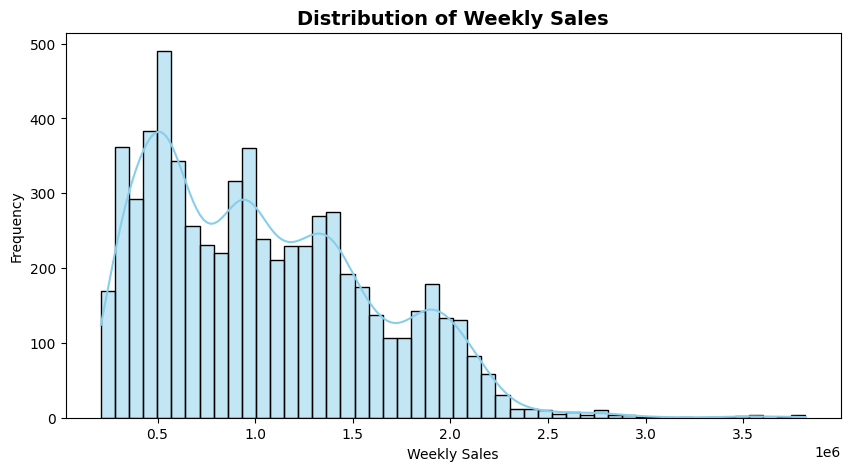

In [41]:
## Distributuion of Weekly sales
plt.figure(figsize=(10,5))
sns.histplot(df['Weekly_Sales'], kde=True, bins=50, color="skyblue")
plt.title('Distribution of Weekly Sales', size=14, fontweight='bold')
plt.xlabel('Weekly Sales')
plt.ylabel('Frequency')
plt.show()

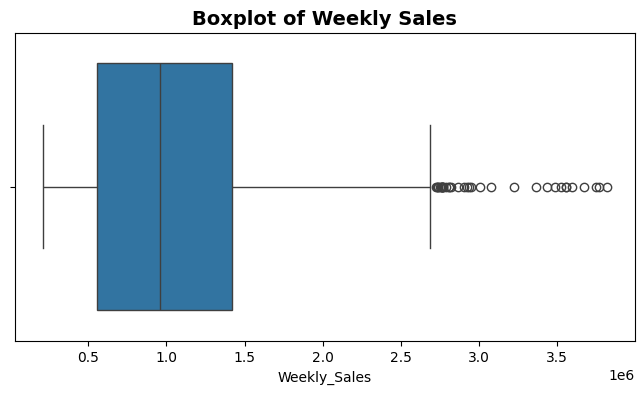

In [46]:
plt.figure(figsize=(8,4))
sns.boxplot(x=df['Weekly_Sales'])
plt.title('Boxplot of Weekly Sales', size=14, fontweight='bold',)
plt.show()

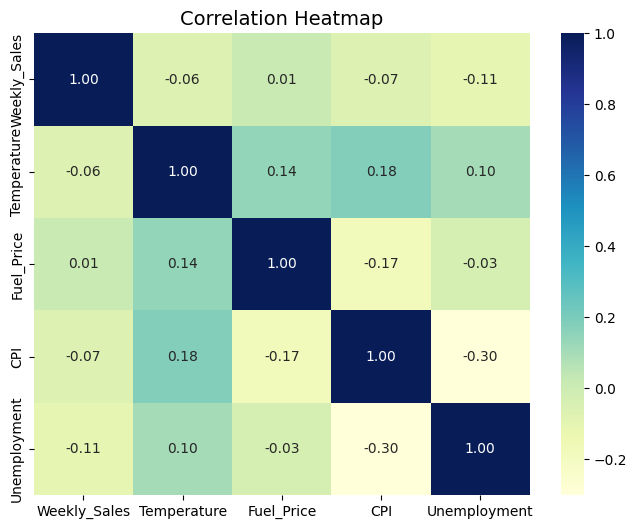

In [ ]:
## Correlation Heatmap
plt.figure(figsize=(8,6))
corr = df[['Weekly_Sales','Temperature','Fuel_Price','CPI','Unemployment']].corr()
sns.heatmap(corr, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Correlation Heatmap", fontsize=14)
plt.show()


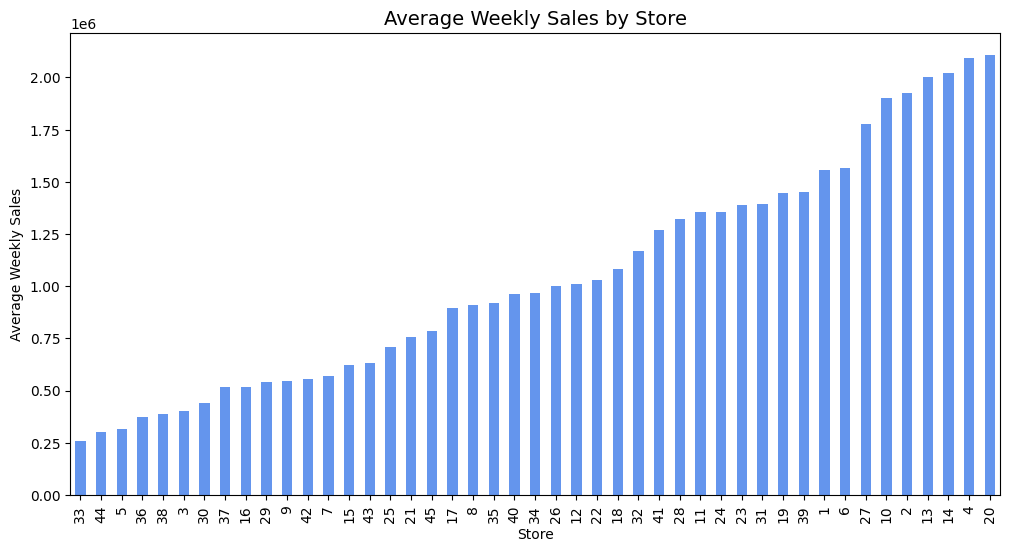

In [51]:
## Average Weekly Sales by Store
store_sales = df.groupby("Store")["Weekly_Sales"].mean().sort_values()

plt.figure(figsize=(12,6))
store_sales.plot(kind="bar", color="cornflowerblue")
plt.title("Average Weekly Sales by Store", fontsize=14)
plt.xlabel("Store")
plt.ylabel("Average Weekly Sales")
plt.show()


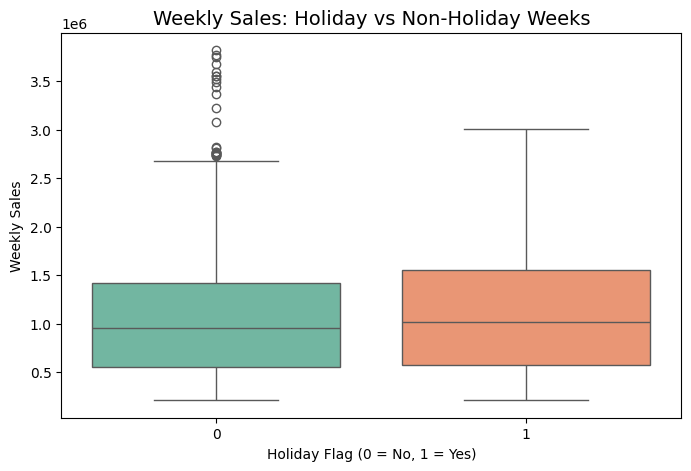

In [50]:
## Sales During Holidays vs Non-Holidays
plt.figure(figsize=(8,5))
sns.boxplot(x="Holiday_Flag", y="Weekly_Sales", hue="Holiday_Flag", 
            data=df, palette="Set2", legend=False)
plt.title("Weekly Sales: Holiday vs Non-Holiday Weeks", fontsize=14)
plt.xlabel("Holiday Flag (0 = No, 1 = Yes)")
plt.ylabel("Weekly Sales")
plt.show()


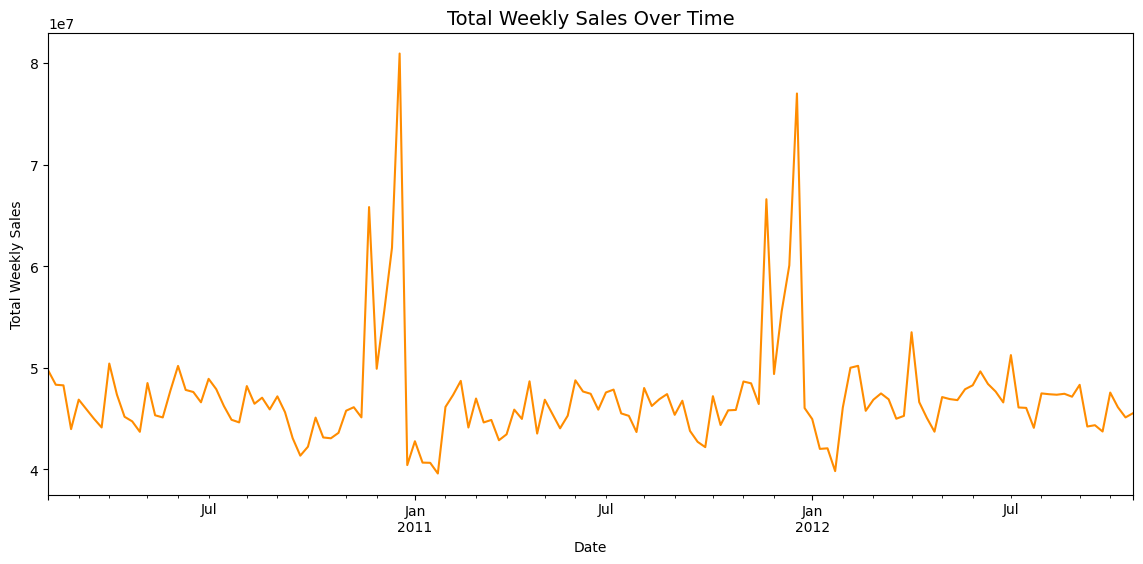

In [52]:
## Sales Trends over time
plt.figure(figsize=(14,6))
df.groupby("Date")["Weekly_Sales"].sum().plot(color="darkorange")
plt.title("Total Weekly Sales Over Time", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Total Weekly Sales")
plt.show()
